### VIX index 介紹 

VIX指數(Volatility Index)又稱波動指數，是由CBOE(芝加哥選擇權交易所)在1993年推出，為指數選擇權隱含波動率加權平均後所得之指數。

指數反映出投資者願付出多少成本去對應自己的投資風險，因此用於反映投資者對後市的恐慌程度，又稱「恐慌指數」。

當指數愈高意味投資人對股市狀況感到不安；當指數愈低，表示市場上的股票指數變動將趨緩。

### VIX index 意義

VIX指數用年化百分比表示，並且大致反映出標準普爾500指數在未來30天的期望走向。

例如，假設VIX指數為15，表示未來30天預期的年化波動率為15%，

因此可以推斷指數期權市場預期未來30天標準普爾500指數向上或向下波動15%/(12)^0.5 = 4.33% 。

也就是，指數期權的定價假設是：標準普爾500指數未來30天的波動率在正負4.33%以內的幾率為68%。

### 實證

TypeError: float() argument must be a string or a number, not 'Timestamp'

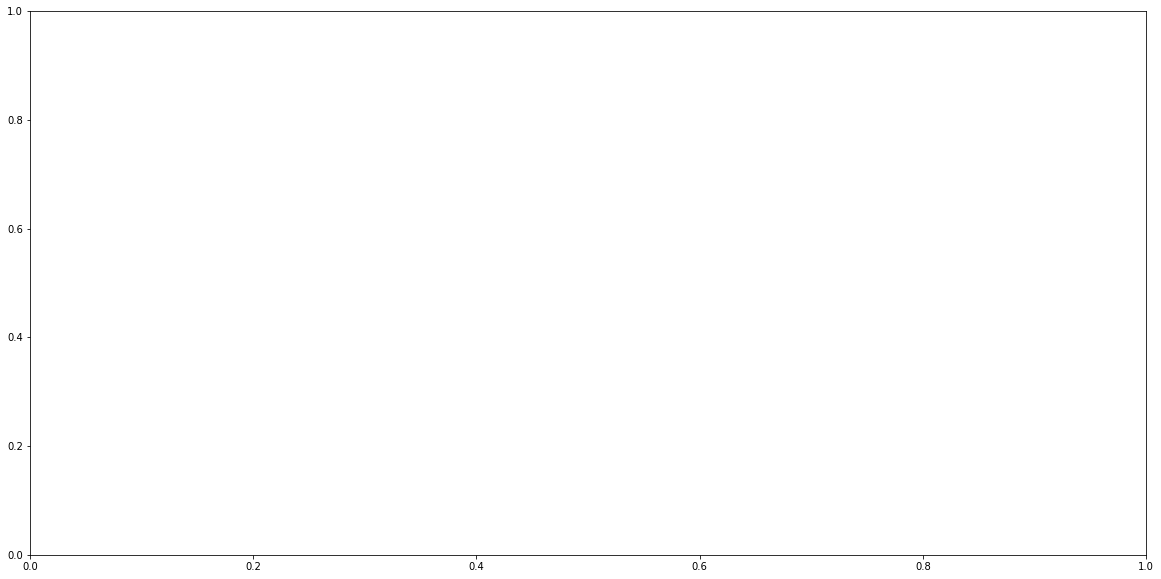

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime


start = datetime.date(2000, 1, 1) # or start = '1/1/2000'
end = datetime.date.today()
sp = web.DataReader('^GSPC', 'yahoo', start, end)
vix = web.DataReader('^VIX', 'yahoo', start, end)

sp = np.log(sp/sp.shift(1))
sp = sp.dropna()

A = sp['Close'].rolling(window = 30).std()
#ma日的標準差

A = A.dropna()
#去除na

A = list(A*np.sqrt(252))
#將日標準差換算成年的標準差

#std_index = list(sp.index[0:len(sp)-29])
A = pd.Series(A)# , index = std_index)
#修改index

B = vix['Close']
B = B[std_index]
#讓A和B的時間期間一樣


#畫圖
fig1 = plt.figure(figsize=(20,10))
#命名畫出來的這張圖叫 'fig1'

ax1 = fig1.add_subplot(111)
#ax1 = fig1.add_subplot(221) #舉例用
#設定圖要在哪個位置 (切幾行, 切幾列, 第幾個)

ax1.plot(std_index , A, color = 'b', linestyle="-", label="SP500")

plt.legend(loc='upper left')
#圖標要放哪

ax1.set_xlabel("Year")
#x軸標題為Year

ax1.set_ylabel("S&P500 30-day std")
#y軸的標題為S&P500 30-day std

ax1.set_title("S&P500 30-day std V.S VIX")

ax2 = ax1.twinx()
#共用X軸 twinx

ax2.set_ylabel("VIX(month)")
ax2.plot(std_index , B, color = 'r', linestyle="-", label="VIX")
plt.legend(loc='upper right')

### Plotly 資料視覺化

In [3]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

trace_sp500_std = go.Scatter(
    x=A.index,
    y=A,
    name = "S&P500",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_vix = go.Scatter(
    x=B.index,
    y=B,
    name = "VIX",
    line = dict(color = '#7F7F7F'),
    #不透明度
    opacity = 0.8,
    yaxis = 'y2')

data = [trace_sp500_std,trace_vix]

#圖層
layout = go.Layout(
    title ='S&P500 30-day std V.S VIX Visualization',
    xaxis=dict(
        #上方選擇區間大小
        rangeselector = dict(
            buttons = list([
                dict(count = 1,
                     label = '1m',
                     step = 'month',
                     stepmode = 'backward'),
                dict(count = 6,
                     label = '6m',
                     step = 'month',
                     stepmode = 'backward'),
                dict(count = 1,
                     label = '1y',
                     step = 'year',
                     stepmode = 'backward'),
                dict(count = 3,
                     label = '3y',
                     step = 'year',
                     stepmode = 'backward'),
                dict(count = 5,
                     label = '5y',
                     step = 'year',
                     stepmode = 'backward'),
                dict(step = 'all')
            ])
        ),
        
        #下方選擇區間控制bar
        rangeslider = dict(
            visible = True
        ),
        type = 'date',
    ),
    yaxis = dict(
        title ='S&P500'
    ),
    yaxis2 = dict(
        title ='VIX',
        titlefont = dict(
            color = 'rgb(148, 103, 189)'
        ),
        tickfont = dict(
            color = 'rgb(148, 103, 189)'
        ),
        overlaying = 'y',
        side = 'right'
    )
)


fig1 = dict(data = data, layout = layout)

#將圖表存至帳號
py.iplot(fig1, filename = "S&P500 30-day std V.S VIX Visualization")

In [4]:
#將圖表另存為html格式
plotly.offline.plot(fig1, filename="S&P500 30-day std V.S VIX Visualization")

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:466: UserWarning:

Your filename `S&P500 30-day std V.S VIX Visualization` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\amyhs\\Desktop\\碩士課程\\計量財務\\報告\\2\\S&P 500 v.s VIX\\S&P500 30-day std V.S VIX Visualization.html'

### VIX、S&P 500與重大事件

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:652: UserWarning:

Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".



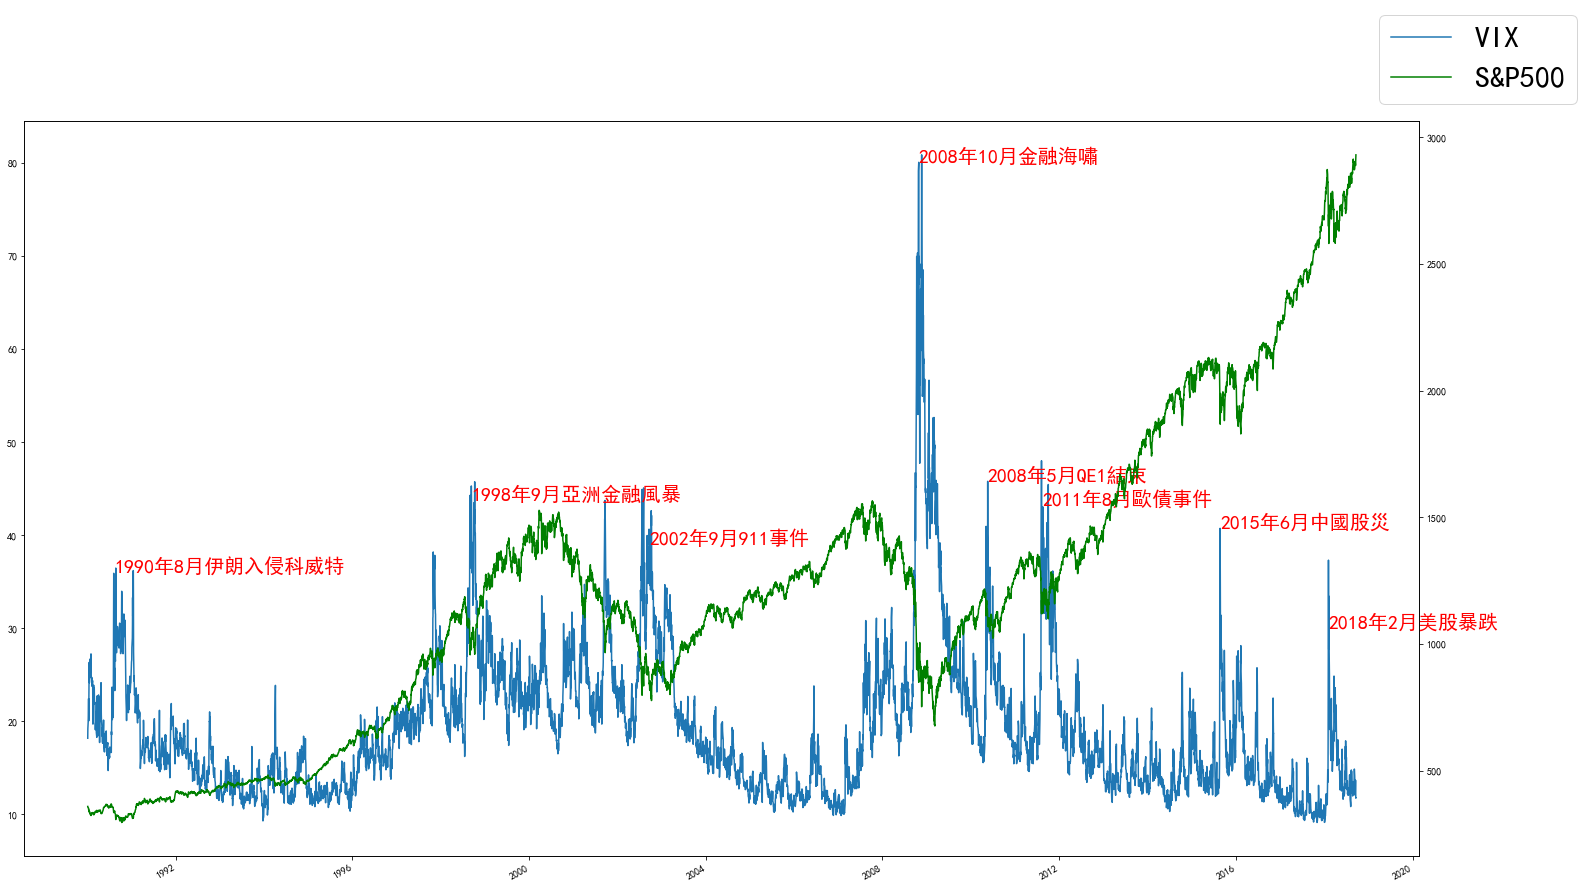

In [5]:
import pandas as pd
from datetime import datetime
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt

#匯入中文字體
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

data_vix=pd.read_csv('VIX .csv')
data_sp500=pd.read_csv('S&P500.csv')

l1=[]
for i in range(len(data_vix)):
    a1=data_vix.loc[i,"Date"]
    b1 = datetime.strptime(a1,"%Y/%m/%d")
    l1.append(b1)
vix=pd.DataFrame(np.array(data_vix["VIX"]),index=l1,columns=["VIX"])

l2=[]
for i in range(len(data_sp500)):
    a2=data_sp500.loc[i,"Date"]
    b2 = datetime.strptime(a2,"%Y/%m/%d")
    l2.append(b2)
sp500=pd.DataFrame(np.array(data_sp500["S&P500"]),index=l2,columns=["S&P500"])

cf=sp500.join(vix,how='inner')
#res = pd.merge(vix,sp500,vix_index=True,sp500_index=True,how='inner')
#把S&P500和VIX兩個dataframe照index合併 

fig2 = plt.figure(figsize=(25,15))
cf["VIX"].plot(label="VIX")
plt.text("19900806",35.91,"1990年8月伊朗入侵科威特",fontdict={"size":20,"color":"r"})
plt.text("19980911",43.74,"1998年9月亞洲金融風暴",fontdict={"size":20,"color":"r"})
plt.text("20020920",38.98,"2002年9月911事件",fontdict={"size":20,"color":"r"})
plt.text("20081027",80.06,"2008年10月金融海嘯",fontdict={"size":20,"color":"r"})
plt.text("20100520",45.79,"2008年5月QE1結束",fontdict={"size":20,"color":"r"})
plt.text("20110819",43.05,"2011年8月歐債事件",fontdict={"size":20,"color":"r"})
plt.text("20150824",40.74,"2015年6月中國股災",fontdict={"size":20,"color":"r"})
plt.text("20180206",29.98,"2018年2月美股暴跌",fontdict={"size":20,"color":"r"})
cf['S&P500'].plot(secondary_y=True, style='g',label="S&P500")

fig2.legend(loc="best",prop={'size':30})
#設置圖例

plt.show()


### Plotly 資料視覺化

In [6]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

trace_sp500 = go.Scatter(
    x=sp500.index,
    y=sp500['S&P500'],
    name = "S&P500",
    line = dict(color = '#17BECF'),
    opacity = 0.8)

trace_vix = go.Scatter(
    x=vix.index,
    y=vix['VIX'],
    name = "VIX",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8,
    yaxis = 'y2')

data = [trace_sp500,trace_vix]

layout = go.Layout(
    title ='S&P500 V.S VIX Visualization',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                     label='1y',
                     step='year',
                     stepmode='backward'),
                dict(count = 3,
                     label = '3y',
                     step = 'year',
                     stepmode = 'backward'),
                dict(count = 5,
                     label = '5y',
                     step = 'year',
                     stepmode = 'backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date',
    ),
    annotations=[
        dict(
            x='1990-08-06',
            y=35.91,
            xref='x',
            yref='y2',
            text="1990年8月伊朗入侵科威特",
            showarrow=True,
            arrowhead=6,
            ax=10,
            ay=-25
        ),
        dict(
            x="1998-09-11",
            y=43.74,
            xref='x',
            yref='y2',
            text="1998年9月亞洲金融風暴",
            showarrow=True,
            arrowhead=6,
            ax=10,
            ay=-25
        ),
        dict(
            x="2002-09-20",
            y=38.98,
            xref='x',
            yref='y2',
            text="2002年9月911事件",
            showarrow=True,
            arrowhead=6,
            ax=10,
            ay=-25
        ),
        dict(
            x="2008-10-27",
            y=80.06,
            xref='x',
            yref='y2',
            text="2008年10月金融海嘯",
            showarrow=True,
            arrowhead=6,
            ax=10,
            ay=-25
        ),
        dict(
            x="2010-05-20",
            y=45.79,
            xref='x',
            yref='y2',
            text="2008年5月QE1結束",
            showarrow=True,
            arrowhead=6,
            ax=15,
            ay=-20
        ),
        dict(
            x="2011-08-19",
            y=43.05,
            xref='x',
            yref='y2',
            text="2011年8月歐債事件",
            showarrow=True,
            arrowhead=6,
            ax=10,
            ay=-45
        ),
        dict(
            x="2015-08-24",
            y=40.74,
            xref='x',
            yref='y2',
            text="2015年6月中國股災",
            showarrow=True,
            arrowhead=6,
            ax=10,
            ay=-25
        ),
        dict(
            x="2018-02-06",
            y=29.98,
            xref='x',
            yref='y2',
            text="2018年2月美股暴跌",
            showarrow=True,
            arrowhead=6,
            ax=10,
            ay=-25
        )
    ],
    yaxis = dict(
        title ='S&P500'
    ),
    yaxis2 = dict(
        title ='VIX',
        titlefont = dict(
            color = 'rgb(148, 103, 189)'
        ),
        tickfont = dict(
            color = 'rgb(148, 103, 189)'
        ),
        overlaying = 'y',
        side = 'right'
    )
)


fig2 = dict(data=data, layout=layout)

py.iplot(fig2, filename = "S&P500 V.S VIX Visualization")

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~amyhsu0619/0 or inside your plot.ly account where it is named 'S&P500 V.S VIX Visualization'


In [7]:
#將圖表另存為html格式
plotly.offline.plot(fig2, filename="S&P500 V.S VIX Visualization")

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:466: UserWarning:

Your filename `S&P500 V.S VIX Visualization` didn't end with .html. Adding .html to the end of your file.



'file://C:\\Users\\amyhs\\Desktop\\碩士課程\\計量財務\\報告\\2\\S&P 500 v.s VIX\\S&P500 V.S VIX Visualization.html'

### 補充

In [19]:
%whos

Variable          Type           Data/Info
------------------------------------------
A                 Series         2000-01-03    0.159526\n2<...>gth: 4687, dtype: float64
B                 Series         Date\n2000-01-03    24.20<...>gth: 4687, dtype: float64
a1                str            2018/9/20
a2                str            2018/9/20
ax1               AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
ax2               AxesSubplot    AxesSubplot(0.125,0.125;0.775x0.755)
b1                datetime       2018-09-20 00:00:00
b2                datetime       2018-09-20 00:00:00
cf                DataFrame                   S&P500    VI<...>\n[7134 rows x 2 columns]
data              list           n=1
data_sp500        DataFrame                 Date   S&P500\<...>\n[7237 rows x 2 columns]
data_vix          DataFrame                 Date    VIX\n0<...>\n[7134 rows x 2 columns]
datetime          type           <class 'datetime.datetime'>
end               date           2018-1